In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [48]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('../datasets/real_estate.csv')

In [50]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,-73.084938,41.346439
2,2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Commercial,-73.084938,41.346439
3,3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,-73.084938,41.346439
4,4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,-72.830800,41.809500
...,...,...,...,...,...,...,...,...,...,...,...,...
1045447,1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1045448,1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1045449,1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,Vacant Land,-73.191290,41.543605
1045450,1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [51]:
df['Town'].value_counts()

Town
Bridgeport    36228
Stamford      34632
Waterbury     30710
Norwalk       25489
New Haven     22611
              ...  
Colebrook       559
Hartland        484
Canaan          471
Scotland        457
Union           284
Name: count, Length: 169, dtype: int64

In [52]:
df=df[df['Town']=='Bridgeport']

In [53]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
371,371,2020-10-01,2020,Bridgeport,116 BASSICK AVE,76090.0,148700.0,0.511700,Residential,Single Family,-73.210960,41.171540
792,792,2020-10-01,2020,Bridgeport,123 FOLINO DR,164920.0,290000.0,0.568600,Residential,Single Family,-73.235400,41.221860
1036,1036,2001-10-29,2001,Bridgeport,176 MORNINGSIDE DR,71050.0,150000.0,0.473667,Residential,Single Family,-73.195200,41.186500
4329,4329,2002-04-22,2001,Bridgeport,24 HARVARD ST,72801.0,169900.0,0.428493,Residential,Single Family,-73.195200,41.186500
4886,4887,2020-10-01,2020,Bridgeport,96 READ ST,99250.0,125000.0,0.794000,Residential,Two Family,-73.156930,41.178970
...,...,...,...,...,...,...,...,...,...,...,...,...
1013283,1021850,2022-09-07,2021,Bridgeport,96 ROSE ST,132640.0,262500.0,0.505200,Residential,Single Family,-73.182090,41.202608
1013297,1021864,2022-07-21,2021,Bridgeport,136 BEECHWOOD AVE,248940.0,350000.0,0.711200,Residential,Two Family,-73.208012,41.181142
1013304,1021871,2022-05-26,2021,Bridgeport,1147 NOBLE AVE #1149,196115.0,475000.0,0.412800,Residential,Two Family,-73.183916,41.197419
1013313,1021880,2022-04-04,2021,Bridgeport,360 JANE ST,21460.0,79000.0,0.271646,Vacant Land,Vacant Land,-73.179256,41.190099


In [54]:
df=df.drop(columns='Unnamed: 0')

In [71]:
X=df[['List Year','Assessed Value','Sale Amount']]

In [72]:
Y=df['Sales Ratio']

In [73]:
pipe=Pipeline([('scale',StandardScaler()),('model',KNeighborsRegressor())])

In [74]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [76]:
yp=pipe.predict(xte)

In [77]:
mean_squared_error(yp,yte)

1021.6479408102599

In [78]:
r2_score(yp,yte)

0.6508714113198085

In [79]:
# Define parameter grid for GridSearchCV
params = {
    'model__n_neighbors': list(range(3, 8,2)),   
    'model__weights': ['uniform', 'distance'],  
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute']   
}

In [80]:
cv = GridSearchCV(pipe, param_grid=params, cv=5, scoring='r2', n_jobs=-1)

In [81]:
cv.fit(xtr, ytr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'model__n_neighbors': [3, 5, 7],
                         'model__weights': ['uniform', 'distance']},
             scoring='r2')

In [82]:
best_params =  cv.best_params_
best_model = cv.best_estimator_

In [83]:
print(f"Best Parameters: {best_params}")

Best Parameters: {'model__algorithm': 'brute', 'model__n_neighbors': 7, 'model__weights': 'distance'}


In [84]:
y_pred = best_model.predict(xte)


In [85]:
mse = mean_squared_error(yte, y_pred)
r2 = r2_score(yte, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 500.1071434872321
R2 Score: 0.8221717485707412


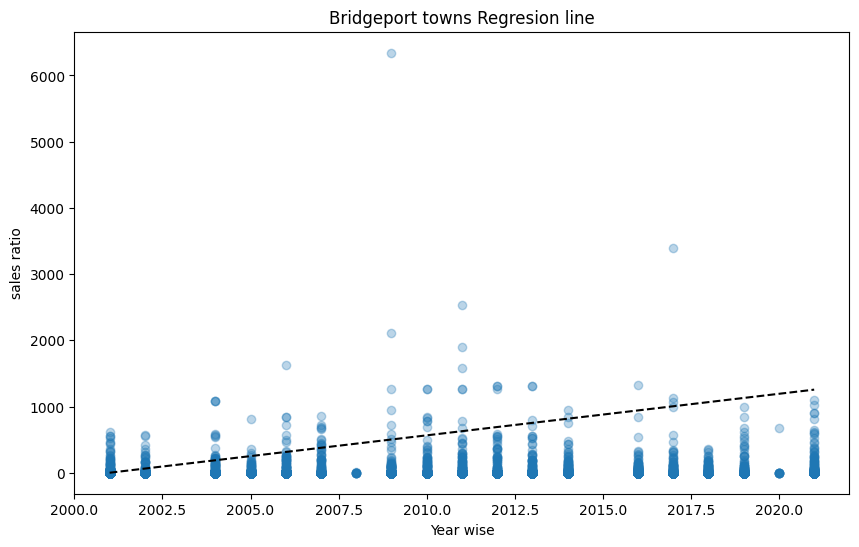

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(xtr.iloc[:, 0:1], ytr, alpha=0.3)
plt.plot([xte.iloc[:, 0:1].min(), xte.iloc[:, 0:1].max()], [y_pred.min(), y_pred.max()], 'k--')
plt.xlabel('Year wise')
plt.ylabel('sales ratio')
plt.title('Bridgeport towns Regresion line')
plt.show()